In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt

In [2]:
raw_dataset=pd.read_csv('data/wine.data.csv')
raw_dataset.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
dataset=raw_dataset.copy()
dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
train_dataset=dataset.sample(frac=.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)
print(train_dataset.shape)
print(test_dataset.shape)

(142, 14)
(36, 14)


In [5]:
train_features=train_dataset.copy()
test_features=test_dataset.copy()
train_label=train_features.pop('Class')
test_label=test_features.pop('Class')
train_features

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
34,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095


In [6]:
train_label=pd.get_dummies(train_label)
train_label

,1,2,3
54,1,0,0
151,0,0,1
63,0,1,0
55,1,0,0
123,0,1,0
...,...,...,...
53,1,0,0
139,0,0,1
128,0,1,0
34,1,0,0


In [7]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [8]:
normalizer=preprocessing.Normalization(input_shape=[13,])

In [9]:
normalizer.adapt(np.asarray(train_features))
normalizer.mean.numpy()

array([1.3024507e+01, 2.3021126e+00, 2.3476760e+00, 1.9154226e+01,
       1.0018310e+02, 2.3214788e+00, 2.0659859e+00, 3.5788733e-01,
       1.6152112e+00, 5.0451407e+00, 9.5704228e-01, 2.6147182e+00,
       7.6173944e+02], dtype=float32)

In [10]:
print(np.asarray(train_features[:1]))
print()
print(normalizer(np.asarray(train_features[:1])).numpy())

[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]]

[[ 0.8902562  -0.55886805 -0.36045736 -0.86196756  1.219721    0.43583182
   0.8233908  -1.1805961   0.00813518  0.35792252 -0.16982616  0.81913364
   0.91772103]]


In [66]:
model=Sequential()
model.add(normalizer)
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 42        
Total params: 69
Trainable params: 42
Non-trainable params: 27
_________________________________________________________________


In [67]:
model.predict(train_features[:10])

array([[0.7030033 , 0.13923675, 0.15775989],
       [0.08480343, 0.771599  , 0.1435976 ],
       [0.62370473, 0.10691747, 0.26937777],
       [0.22175142, 0.10550353, 0.67274505],
       [0.41965708, 0.09808641, 0.48225656],
       [0.0907241 , 0.47951195, 0.429764  ],
       [0.1901658 , 0.44595093, 0.36388332],
       [0.14170708, 0.72538435, 0.13290855],
       [0.6724491 , 0.1763948 , 0.15115608],
       [0.4397194 , 0.31945765, 0.24082291]], dtype=float32)

In [68]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=.01), metrics=['accuracy'])

In [69]:
train_history=model.fit(train_features,train_label,validation_split=.2,epochs=200)

.0531 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 67/200
113/113 [==============================] - 0s 185us/sample - loss: 0.0523 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 68/200
113/113 [==============================] - 0s 203us/sample - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 1.0000
Epoch 69/200
113/113 [==============================] - 0s 212us/sample - loss: 0.0508 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 1.0000
Epoch 70/200
113/113 [==============================] - 0s 221us/sample - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 1.0000
Epoch 71/200
113/113 [==============================] - 0s 194us/sample - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 72/200
113/113 [==============================] - 0s 203us/sample - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 73/200
113/113 [=======================

In [70]:
from plot_helper import plot_confusion_matrix, plt_loss_learning_curve, plt_accuracy_learning_curve

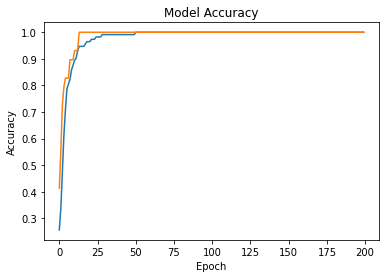

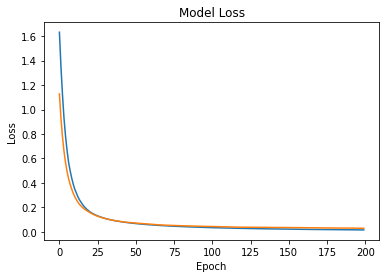

In [71]:
plt_accuracy_learning_curve(train_history)
plt_loss_learning_curve(train_history)

In [62]:
predicted_classes=model.predict_classes(test_features)
predicted_classes=pd.Series(predicted_classes)
predicted_classes=predicted_classes.map({0:1,1:2,2:3})
predicted_classes

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
dtype: int64

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(np.asarray(test_label),predicted_classes)

1.0

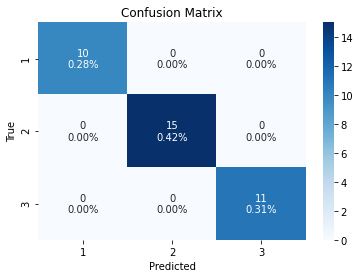

In [72]:
plot_confusion_matrix(test_label,predicted_classes,labels=['1','2','3'])

In [73]:
from sklearn.metrics import confusion_matrix

In [77]:
import seaborn as sns

In [76]:
cm=confusion_matrix(test_label,predicted_classes)
print(cm)

[[10  0  0]
 [ 0 15  0]
 [ 0  0 11]]


<AxesSubplot:>

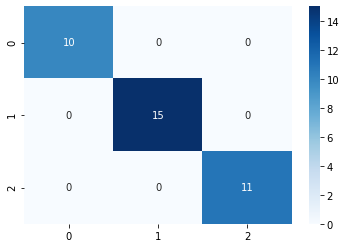

In [87]:
sns.heatmap(cm,annot=True,fmt='',cmap='Blues')